<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-07-24 14:43:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-07-24 14:43:17 (66.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [4]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-07-24 14:43:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-07-24 14:43:18 (41.8 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Data From CSV File


In [5]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [6]:
train_df = pd.read_csv('loan_train.csv')
train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [7]:
df = pd.concat([train_df, test_df])

In [8]:
n_train = len(train_df)

In [9]:
train_df.shape

(346, 10)

In [10]:
df.shape

(400, 10)

### Convert to date time object


In [11]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [12]:
df['loan_status'].value_counts()

PAIDOFF       300
COLLECTION    100
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [13]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



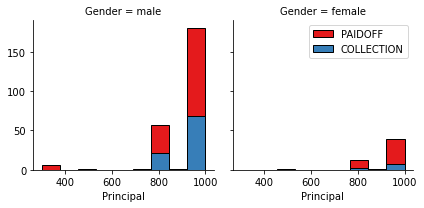

In [14]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

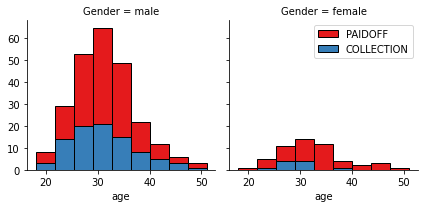

In [15]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


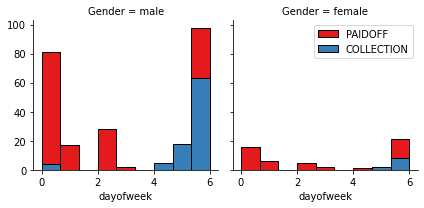

In [16]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [17]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [18]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.841270
        COLLECTION     0.158730
male    PAIDOFF        0.732938
        COLLECTION     0.267062
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [19]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [20]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.788462
                      COLLECTION     0.211538
High School or Below  PAIDOFF        0.715116
                      COLLECTION     0.284884
Master or Above       PAIDOFF        0.750000
                      COLLECTION     0.250000
college               PAIDOFF        0.773256
                      COLLECTION     0.226744
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [21]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [22]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [23]:
X = Feature[:n_train]
test_x = Feature[n_train:]

What are our lables?


In [24]:
d = {'COLLECTION':1, 'PAIDOFF':0}

In [25]:
y = df['loan_status'][:n_train].map(d)

In [26]:
test_y = df['loan_status'][n_train:].map(d)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [27]:
S = preprocessing.StandardScaler()

In [28]:
X= S.fit_transform(X)
test_x = S.transform(test_x)

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.metrics import jaccard_score, f1_score, log_loss, accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)

In [31]:
knn = KNeighborsClassifier()

In [33]:
knn_params = [{'n_neighbors': np.arange(2,10)}]

In [34]:
skf = StratifiedKFold(3, shuffle=True, random_state=30)

In [35]:
def rand_cv(model, params, X, y):
    
    cv = GridSearchCV(model, params, scoring='f1', cv=skf)
    cv.fit(X, y)
    print(f'{cv.best_params_}, score:{cv.best_score_}')    

In [36]:
rand_cv(knn, knn_params,X ,y)

{'n_neighbors': 3}, score:0.378169449598021


In [37]:
def scoring(pred, model=None):
    
    '''Function for scoring'''
    
    jc = jaccard_score(test_y, pred.round())
    f1 = f1_score(test_y, pred.round())
    acc = accuracy_score(test_y, pred.round())
    
    print(f'jaccard_score: {jc}\nf1: {f1}\nacc: {acc}')
    if model=='lr':
        ll = log_loss(test_y, pred)
        print(f'log_loss: {ll}')

In [38]:
def train(model, X, y):
    
    '''Function for training model'''
    
    err=[]
    y_score=[]
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import f1_score
    fold= StratifiedKFold(n_splits=3,shuffle=True, random_state=21)

    for train_index, test_index in fold.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        m= model
        m.fit(X_train,y_train)
        preds=m.predict(X_test)
        print("err: ",f1_score(y_test,preds))
        err.append(f1_score(y_test,preds))
        p = m.predict(test_x)
        y_score.append(p)
        
    return err, y_score

In [292]:
err_knn, y_knn = train(KNeighborsClassifier(3), X, y)

err:  0.46875000000000006
err:  0.43478260869565216
err:  0.25


In [249]:
np.mean(err_knn)

0.38451086956521746

In [250]:
scoring(np.mean(y_knn, 0))

jaccard_score: 0.08333333333333333
f1: 0.15384615384615383
acc: 0.5925925925925926


# Decision Tree


In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier(random_state=21)

In [51]:
dt_params = [{'criterion':['gini','entropy'],
             'max_depth': [None, 2, 3, 4],
             'min_samples_split': np.arange(2,10)}]

In [256]:
rand_cv(dt, dt_params, X, y)

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4}, score:0.37925925925925924


In [293]:
err, y_score_dt = train(DecisionTreeClassifier(random_state = 21, min_samples_split=4), X, y)

err:  0.32
err:  0.32653061224489793
err:  0.2545454545454545


In [258]:
np.mean(err)

0.30035868893011747

In [259]:
scoring(np.mean(y_score_dt, 0))

jaccard_score: 0.0
f1: 0.0
acc: 0.7407407407407407


# Support Vector Machine


In [46]:
from sklearn.svm import SVC

In [47]:
svc = SVC(random_state=32)

In [48]:
svm_params = [{'C':np.linspace(1.0,5.0,5),
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2,5)}]

In [274]:
rand_cv(svc, svm_params,X, y)

{'C': 4.0, 'degree': 2, 'kernel': 'sigmoid'}, score:0.37589605734767023


In [275]:
err_svm, y_svm = train(SVC(random_state=21, kernel='sigmoid', degree=4, C=4.0),X, y)

err:  0.3333333333333333
err:  0.23529411764705882
err:  0.28


In [282]:
scoring(np.mean(y_svm, 0))

jaccard_score: 0.25925925925925924
f1: 0.4117647058823529
acc: 0.25925925925925924


# Logistic Regression


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression(random_state=21)

In [43]:
lr_params = [{'C':np.linspace(1, 3, 10)}]

In [279]:
rand_cv(lr, lr_params, X, y)

{'C': 1.6666666666666665}, score:0.2438280461235985


In [294]:
err_lr, y_lr = train(LogisticRegression(random_state=21, C=1.67), X, y)

err:  0.2162162162162162
err:  0.11111111111111112
err:  0.24489795918367346


In [288]:
scoring(np.mean(y_lr, 0), 'lr')

jaccard_score: 0.0
f1: 0.0
acc: 0.7407407407407407
log_loss: 0.58516993269778


# Try OverSampling

In [297]:
%%capture
!pip install imbalanced_learn
!pip install delayed

In [1]:
from imblearn.over_sampling import SMOTE

lr

In [41]:
oversample = SMOTE()
X_ov, y_ov = oversample.fit_resample(X, y)

In [44]:
rand_cv(lr, lr_params, X_ov, y_ov)

{'C': 2.111111111111111}, score:0.7935862156522017


In [45]:
err_lr2, y_lr2 = train(LogisticRegression(random_state=21, C=2.1), X_ov, y_ov)

err:  0.8349514563106796
err:  0.7450980392156863
err:  0.7941176470588235


In [53]:
np.mean(err_lr2)

0.7913890475283964

In [55]:
scoring(np.mean(y_lr2,0), 'lr')

jaccard_score: 0.36666666666666664
f1: 0.5365853658536585
acc: 0.6481481481481481
log_loss: 10.944249594208763


dt

In [56]:
rand_cv(dt, dt_params, X_ov, y_ov)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}, score:0.8012069488560849


In [58]:
err_dt2, y_dt2 = train(DecisionTreeClassifier(random_state=21, max_depth=3, min_samples_split=2), X_ov, y_ov)

err:  0.8309178743961353
err:  0.7867298578199053
err:  0.7981220657276995


In [59]:
np.mean(err_dt2)

0.80525659931458

In [60]:
scoring(np.mean(y_dt2, 0))

jaccard_score: 0.43333333333333335
f1: 0.6046511627906977
acc: 0.6851851851851852


svm

In [61]:
rand_cv(svc, svm_params, X_ov, y_ov)

{'C': 2.0, 'degree': 4, 'kernel': 'poly'}, score:0.8040705746892884


In [63]:
err_svm2, y_svm2 = train(SVC(C=2, degree=4, kernel='poly'), X_ov, y_ov)

err:  0.8040201005025126
err:  0.7902439024390243
err:  0.781725888324873


In [64]:
np.mean(err_svm2)

0.7919966304221365

In [65]:
scoring(np.mean(y_svm2, 0))

jaccard_score: 0.4444444444444444
f1: 0.6153846153846153
acc: 0.7222222222222222


knn

In [66]:
rand_cv(knn, knn_params, X_ov, y_ov)

{'n_neighbors': 5}, score:0.7958549068882125


In [68]:
err_knn2, y_knn2 = train(KNeighborsClassifier(5), X_ov, y_ov)

err:  0.7448979591836735
err:  0.774869109947644
err:  0.8


In [69]:
np.mean(err_knn2)

0.7732556897104391

In [70]:
scoring(np.mean(y_knn2, 0))

jaccard_score: 0.37037037037037035
f1: 0.5405405405405405
acc: 0.6851851851851852


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.4     | 0.5      | NA      |
| Decision Tree      | 0.43    | 0.6      | NA      |
| SVM                | 0.44    | 0.62     | NA      |
| LogisticRegression | 0.37    | 0.54     | 11      |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description |
|---|---|---|---|
| 2020-10-27 | 2.1 | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27 | 2.0 | Malika Singla | Added lab to GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
